
# Import Necessary Libraries


# Import libraries

In [1]:
import os 
print("hi")

hi


In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
'''
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn
'''

'\n!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118\n!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
#from natsort import natsorted # type: ignore
from sklearn.model_selection import GroupShuffleSplit
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.utils.data import WeightedRandomSampler
import seaborn as sns
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import time
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import precision_score as skl_precision_score
from sklearn.metrics import recall_score as skl_recall_score
from sklearn.metrics import f1_score as skl_f1_score
from sklearn.metrics import accuracy_score as skl_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import random
import warnings
import shutil
# Save metrics dictionary (H) after training completes
import pickle
import os


# Import the code from all .py files

from custom_dataset import CustomMelanomaDataset  # Import the custom dataset
from resnet_model import ResNetModel
from preprocessing_csv import PreprocessingCSV
from train_test_loop import train_and_test
from lesion_predictions import LesionPredictions
from FocalLoss import FocalLoss
#from malignant_augmentation import TrainMalignantAugmentor, TestMalignantAugmentor


In [3]:
warnings.filterwarnings("ignore")


In [4]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Create the full path to the CSV file
csv_path = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')

# Load the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign     0.0  
1   unknown           benign     0.0  
2     nevus           benign     0.0  
3   unknown           benign     0.0  
4   unknown           benign     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null 

In [6]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Step 1: Define the universal path handling logic
SPLIT_CSV_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv')

# Universal Path Setup for Images
IMAGE_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'JPEG')

# Paths for Train/Test CSVs
TRAIN_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_split.csv')
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')

# Create the full path to the CSV file
CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')
preprocess_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth_preprocess.csv')

# to overcome class imbalance
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

# save model after training/testing
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

#save metrics dictionary
# Set a specific directory to save the file
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

# save the plot PNG
PLOT_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')


In [53]:
'''
# Step : Create an instance of PreprocessingCSV
preprocessor = PreprocessingCSV(csv_path, BASE_DIR)

# Step : Execute the preprocessing steps
preprocessor.analyze_raw_data()
preprocessor.check_for_anomalies()
preprocessor.clean_data()
preprocessor.save_clean_data()
preprocessor.split_by_patient_id()
preprocessor.verify_preprocessed_data()
'''


 
 Unique values in 'anatom_site_general_challenge': ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'nan'
 'lower extremityi wrote to him' 'palms/soles' 'oral/genital']

 
 Rows with variations of 'unknown':
 Empty DataFrame
Columns: [image_name, patient_id, sex, age_approx, anatom_site_general_challenge, diagnosis, benign_malignant, target]
Index: []

 
 Unique values in 'anatom_site_general_challenge' after cleanup: ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'unknown'
 'palms/soles' 'oral/genital']

 
 NaN values in each column:
 image_name                        0
patient_id                        0
sex                              65
age_approx                       68
anatom_site_general_challenge     0
diagnosis                         0
benign_malignant                  0
target                            1
dtype: int64


 Infinity values in each column:
 image_name                       0
patient_id                       0
sex                           

# Ratio of dataset. Analysis of Benign/Malignant in dataset

In [54]:
'''
def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")

Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 439

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 136


# Creating offline Augmentations for traing and test dataset to overcome class imbalance



# Ratio after Augmemntation of target Benign/Malignants in dataset

Here must run malignant_augmentation.py seperately.or run once here after all its purpose is served so never run


In [7]:
print(TRAIN_CSV_PATH)
print(IMAGE_DIR)
print(TEST_CSV_PATH)

/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/Train_JPEG/JPEG
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv


In [56]:
'''

class TrainMalignantAugmentor:
    def __init__(self, train_aug_csv, image_dir, augmentations_per_image=15):
        self.train_aug_csv = train_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.train_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for training dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.train_aug_csv, index=False)
        print(f"Updated metadata saved to {self.train_aug_csv}")
        print("Process finished successfully.")


class TestMalignantAugmentor:
    def __init__(self, test_aug_csv, image_dir, augmentations_per_image=10):
        self.test_aug_csv = test_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.test_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation (Test)", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for test dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.test_aug_csv, index=False)
        print(f"Updated metadata saved to {self.test_aug_csv}")
        print("Process finished successfully.")
'''

In [57]:
'''
# Initialize the augmentor for training data
train_augmentor = TrainMalignantAugmentor(
        train_aug_csv=TRAIN_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for training
train_augmentor.perform_augmentation()
train_augmentor.save_updated_metadata()
'''

Performing Image Augmentation: 100%|██████████| 24300/24300 [1:24:55<00:00,  4.77image/s]  


Image augmentations for training dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
Process finished successfully.


In [58]:
'''
# Initialize the augmentor for test data
test_augmentor = TestMalignantAugmentor(
        test_aug_csv=TEST_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for testing
test_augmentor.perform_augmentation()
test_augmentor.save_updated_metadata()
'''

Performing Image Augmentation (Test): 100%|██████████| 8230/8230 [17:36<00:00,  7.79image/s]


Image augmentations for test dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv
Process finished successfully.


# Ratio after Augmemntation of target Benign/Malignants in dataset

In [8]:
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

In [9]:

def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")


Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 7024

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 1496


# 24k benign trained in 2 stages, 2 * (12k benign + 7K malignant) 

# Split the Benign into 2 phase trainnig.

In [61]:
'''
import random
import os
import pandas as pd

# Load the dataset
data = pd.read_csv(TRAIN_CSV_PATH)

# Verify the labels in the dataset
print("Unique values in 'benign_malignant' column:", data['benign_malignant'].unique())

# Group by patient_id
grouped = data.groupby('patient_id')

# Separate benign and malignant cases
benign_data = data[data['benign_malignant'] == 'benign']
malignant_data = data[data['benign_malignant'] == 'malignant']

# Check the number of benign and malignant samples before proceeding
print(f"Total benign cases: {len(benign_data)}")
print(f"Total malignant cases: {len(malignant_data)}")

if len(malignant_data) < 7024:
    print("Warning: Malignant data count is less than expected. Please check the data source or filtering logic.")

# Shuffle benign patient groups and split approximately in half
benign_patient_ids = list(benign_data['patient_id'].unique())
random.shuffle(benign_patient_ids)
split_index = len(benign_patient_ids) // 2

# Split benign data into two halves based on patient IDs
benign_pass1 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[:split_index])]
benign_pass2 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[split_index:])]

# Add all malignant cases to both pass1 and pass2
train_pass1 = pd.concat([benign_pass1, malignant_data], ignore_index=True)
train_pass2 = pd.concat([benign_pass2, malignant_data], ignore_index=True)

# Ensure the output directory exists
if not os.path.exists(os.path.dirname(TRAIN_CSV_PASS1)):
    os.makedirs(os.path.dirname(TRAIN_CSV_PASS1))

# Save the passes to their respective CSV files
train_pass1.to_csv(TRAIN_CSV_PASS1, index=False)
train_pass2.to_csv(TRAIN_CSV_PASS2, index=False)

print(f"Pass 1 saved to {TRAIN_CSV_PASS1}")
print(f"Pass 2 saved to {TRAIN_CSV_PASS2}")

'''

Unique values in 'benign_malignant' column: ['benign' 'malignant']
Total benign cases: 23861
Total malignant cases: 7024
Pass 1 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass1.csv
Pass 2 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass2.csv


In [10]:

# Count and print the number of benign and malignant cases in each training pass
def count_cases(csv_path):
    data = pd.read_csv(csv_path)
    benign_count = len(data[data['benign_malignant'] == 'benign'])
    malignant_count = len(data[data['benign_malignant'] == 'malignant'])
    return benign_count, malignant_count

benign_count_pass1, malignant_count_pass1 = count_cases(TRAIN_CSV_PASS1)
benign_count_pass2, malignant_count_pass2 = count_cases(TRAIN_CSV_PASS2)

print(f"\nPass 1 - Benign: {benign_count_pass1}, Malignant: {malignant_count_pass1}")
print(f"Pass 2 - Benign: {benign_count_pass2}, Malignant: {malignant_count_pass2}")



Pass 1 - Benign: 11334, Malignant: 7024
Pass 2 - Benign: 11334, Malignant: 7024


# Define Transformations

In [11]:
# Training Transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(30),  # Random rotation for variety
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color jitter for diversity
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Testing Transformations
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


# Define train and test datasets


In [12]:
# Initialize datasets for Pass 1 and Pass 2
train_pass1_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS1,  # CSV for Pass 1 with 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

train_pass2_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS2,  # CSV for Pass 2 with the remaining 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

test_dataset = CustomMelanomaDataset(
    csv_file=TEST_CSV_PATH,  # Test CSV with augmented malignant and original benign samples
    image_dir=IMAGE_DIR,
    transform=test_transforms,
    is_test=True
)


# configs

In [13]:
# Learning parameters
lr = 1e-5  # Keep the learning rate the same initially. adjust it based on training performance
NUM_EPOCHS = 30  # Increase to 20 for better convergence given more computational resources
BATCH_SIZE = 128  # Increase batch size to 64/128 to fully utilize the GPU memory
num_workers = 16  # Increase num_workers to 16 to leverage my 32 CPUs and speed up data loading
early_stopping_patience = 5 # early stopping limit

# Determine if CUDA is available
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
PIN_MEMORY = True if torch.cuda.is_available() else False

print(f"[INFO] Using device: {DEVICE}")


[INFO] Using device: cuda


In [14]:
# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}\n")

    # Loop through each GPU and print details
    for i in range(num_gpus):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**2:.2f} MB")
        print(f"  - Memory Cached: {torch.cuda.memory_reserved(i)/1024**2:.2f} MB")
else:
    print("No GPU available.")


Number of GPUs available: 2


GPU 0: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB

GPU 1: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB


# Define dataloaders, lossFunc, Optim

In [15]:
# Compute weights for Pass 1 dataset
malignant_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass1 = len(train_pass1_dataset)

# Set weights: higher for minority class (for Pass 1)
weights_pass1 = [
    benign_count_pass1 / total_count_pass1 if label == 0 else malignant_count_pass1 / total_count_pass1
    for label in train_pass1_dataset.metadata['target']
]
sampler_pass1 = WeightedRandomSampler(weights_pass1, len(weights_pass1))


In [16]:
# Compute weights for Pass 2 dataset
malignant_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass2 = len(train_pass2_dataset)

# Set weights: higher for minority class (for Pass 2)
weights_pass2 = [
    benign_count_pass2 / total_count_pass2 if label == 0 else malignant_count_pass2 / total_count_pass2
    for label in train_pass2_dataset.metadata['target']
]
sampler_pass2 = WeightedRandomSampler(weights_pass2, len(weights_pass2))


In [17]:

# Create DataLoaders for Pass 1, Pass 2, and Test dataset
# Create DataLoaders with weighted sampler for Pass 1 and Pass 2
train_pass1_loader = DataLoader(
    dataset=train_pass1_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass1,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

train_pass2_loader = DataLoader(
    dataset=train_pass2_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass2,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,  # No need to shuffle test data
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

print("DataLoaders created successfully.")

DataLoaders created successfully.


In [18]:
# Calculate steps per epoch
trainSteps1 = len(train_pass1_loader)
trainSteps2 = len(train_pass2_loader)

testSteps = len(test_loader)

print(f"[INFO] Training steps for Pass 1 per epoch: {trainSteps1}")
print(f"[INFO] Training steps for Pass 2 per epoch: {trainSteps2}")
print(f"[INFO] Testing steps per epoch: {testSteps}")


[INFO] Training steps for Pass 1 per epoch: 144
[INFO] Training steps for Pass 2 per epoch: 144
[INFO] Testing steps per epoch: 75


 # Initialize Model, Loss Function, and Optimizer

In [19]:
# Define the model, where we pass the number of metadata features (3 in this case)
num_metadata_features = 3  # Number of metadata features: sex, age, and site
model = ResNetModel(num_metadata_features).to(DEVICE)

# Loss function and optimizer #old lossFunc
#lossFunc = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
lossFunc = FocalLoss(alpha=3, gamma=2)  # Adjust alpha to give more weight to malignant class

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#old scheduler
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Learning rate scheduler
# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

In [20]:
print(model)

ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

# Initialize Training History Dictionary

#  Training Loop Implementation with Metric Tracking and Validation

In [21]:
# Train on Pass 1 Dataset
print("Starting training with Pass 1 Dataset")
H_pass1 = train_and_test(
    model=model,
    train_loader=train_pass1_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH,
    early_stopping_patience=early_stopping_patience

)
# After training, we can use H for further analysis or plotting


Starting training with Pass 1 Dataset

Epoch 1/30 running...


Testing: 100%|██████████| 75/75 [01:04<00:00,  1.16batch/s]


[INFO] EPOCH: 1/30
Train loss: 0.225074
Train Accuracy: 0.889912
Train Precision: 0.911906
Train Recall: 0.668886
Train F1 Score: 0.771716
Train ROC AUC: 0.944262
Test loss: 0.116425
Test Accuracy: 0.953910
Test Precision: 0.924869
Test Recall: 0.810829
Test F1 Score: 0.864103
Test ROC AUC: 0.973223
Test Average Precision Score: 0.925627


Epoch 2/30 running...


Testing: 100%|██████████| 75/75 [01:06<00:00,  1.13batch/s]


[INFO] EPOCH: 2/30
Train loss: 0.094132
Train Accuracy: 0.962142
Train Precision: 0.962521
Train Recall: 0.897003
Train F1 Score: 0.928608
Train ROC AUC: 0.985362
Test loss: 0.086059
Test Accuracy: 0.968822
Test Precision: 0.981757
Test Recall: 0.824866
Test F1 Score: 0.896499
Test ROC AUC: 0.980496
Test Average Precision Score: 0.949493


Epoch 3/30 running...


Testing: 100%|██████████| 75/75 [01:03<00:00,  1.17batch/s]


[INFO] EPOCH: 3/30
Train loss: 0.082990
Train Accuracy: 0.966500
Train Precision: 0.972018
Train Recall: 0.905527
Train F1 Score: 0.937595
Train ROC AUC: 0.987853
Test loss: 0.074644
Test Accuracy: 0.972263
Test Precision: 0.983142
Test Recall: 0.845588
Test F1 Score: 0.909192
Test ROC AUC: 0.982769
Test Average Precision Score: 0.955132


Epoch 4/30 running...


Testing: 100%|██████████| 75/75 [01:03<00:00,  1.19batch/s]


[INFO] EPOCH: 4/30
Train loss: 0.078649
Train Accuracy: 0.967970
Train Precision: 0.974226
Train Recall: 0.909920
Train F1 Score: 0.940976
Train ROC AUC: 0.988940
Test loss: 0.077462
Test Accuracy: 0.970907
Test Precision: 0.978380
Test Recall: 0.843583
Test F1 Score: 0.905995
Test ROC AUC: 0.981739
Test Average Precision Score: 0.952991


Epoch 5/30 running...


Testing: 100%|██████████| 75/75 [01:06<00:00,  1.13batch/s]


[INFO] EPOCH: 5/30
Train loss: 0.072620
Train Accuracy: 0.969114
Train Precision: 0.974343
Train Recall: 0.913196
Train F1 Score: 0.942779
Train ROC AUC: 0.990693
Test loss: 0.071314
Test Accuracy: 0.975495
Test Precision: 0.987635
Test Recall: 0.860294
Test F1 Score: 0.919577
Test ROC AUC: 0.984201
Test Average Precision Score: 0.958906


Epoch 6/30 running...


Testing: 100%|██████████| 75/75 [01:03<00:00,  1.17batch/s]


[INFO] EPOCH: 6/30
Train loss: 0.065860
Train Accuracy: 0.972927
Train Precision: 0.974857
Train Recall: 0.927280
Train F1 Score: 0.950473
Train ROC AUC: 0.992548
Test loss: 0.074539
Test Accuracy: 0.973201
Test Precision: 0.973034
Test Recall: 0.866979
Test F1 Score: 0.916950
Test ROC AUC: 0.983363
Test Average Precision Score: 0.957855


Epoch 7/30 running...


Testing: 100%|██████████| 75/75 [01:05<00:00,  1.15batch/s]


[INFO] EPOCH: 7/30
Train loss: 0.064700
Train Accuracy: 0.971947
Train Precision: 0.974069
Train Recall: 0.924053
Train F1 Score: 0.948402
Train ROC AUC: 0.993036
Test loss: 0.082597
Test Accuracy: 0.971011
Test Precision: 0.974809
Test Recall: 0.849599
Test F1 Score: 0.907907
Test ROC AUC: 0.982418
Test Average Precision Score: 0.953255


Epoch 8/30 running...


Testing: 100%|██████████| 75/75 [01:03<00:00,  1.18batch/s]


[INFO] EPOCH: 8/30
Train loss: 0.060057
Train Accuracy: 0.974779
Train Precision: 0.976137
Train Recall: 0.932580
Train F1 Score: 0.953861
Train ROC AUC: 0.993665
Test loss: 0.076669
Test Accuracy: 0.973723
Test Precision: 0.981962
Test Recall: 0.856952
Test F1 Score: 0.915208
Test ROC AUC: 0.983283
Test Average Precision Score: 0.955678


Epoch 9/30 running...


Testing: 100%|██████████| 75/75 [01:06<00:00,  1.13batch/s]


[INFO] EPOCH: 9/30
Train loss: 0.053709
Train Accuracy: 0.977122
Train Precision: 0.980842
Train Recall: 0.938156
Train F1 Score: 0.959024
Train ROC AUC: 0.994904
Test loss: 0.073674
Test Accuracy: 0.972784
Test Precision: 0.962031
Test Recall: 0.881684
Test F1 Score: 0.920107
Test ROC AUC: 0.983581
Test Average Precision Score: 0.957533


Epoch 10/30 running...


Testing: 100%|██████████| 75/75 [01:05<00:00,  1.14batch/s]

[INFO] EPOCH: 10/30
Train loss: 0.050710
Train Accuracy: 0.978919
Train Precision: 0.980628
Train Recall: 0.942756
Train F1 Score: 0.961319
Train ROC AUC: 0.995784
Test loss: 0.073359
Test Accuracy: 0.975287
Test Precision: 0.977747
Test Recall: 0.873663
Test F1 Score: 0.922779
Test ROC AUC: 0.983943
Test Average Precision Score: 0.958210

Early stopping triggered. Stopping training.
[INFO] Total time taken to train the model: 1882.0 seconds


# Saving the metrics for Pass 1 in H

In [22]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass1, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass1.pkl


In [23]:
# Train on Pass 2 Dataset
print("Starting training with Pass 2 Dataset")
H_pass2 = train_and_test(
    model=model,
    train_loader=train_pass2_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH,
    early_stopping_patience=early_stopping_patience

)


Starting training with Pass 2 Dataset

Epoch 1/30 running...


Testing: 100%|██████████| 75/75 [01:06<00:00,  1.13batch/s]


[INFO] EPOCH: 1/30
Train loss: 0.045371
Train Accuracy: 0.980009
Train Precision: 0.979518
Train Recall: 0.948474
Train F1 Score: 0.963746
Train ROC AUC: 0.996683
Test loss: 0.082508
Test Accuracy: 0.973097
Test Precision: 0.974316
Test Recall: 0.864305
Test F1 Score: 0.916019
Test ROC AUC: 0.982419
Test Average Precision Score: 0.955859


Epoch 2/30 running...


Testing: 100%|██████████| 75/75 [01:08<00:00,  1.10batch/s]


[INFO] EPOCH: 2/30
Train loss: 0.048237
Train Accuracy: 0.979845
Train Precision: 0.980699
Train Recall: 0.946100
Train F1 Score: 0.963089
Train ROC AUC: 0.995958
Test loss: 0.083564
Test Accuracy: 0.973618
Test Precision: 0.975283
Test Recall: 0.866310
Test F1 Score: 0.917572
Test ROC AUC: 0.983928
Test Average Precision Score: 0.956982


Epoch 3/30 running...


Testing: 100%|██████████| 75/75 [01:04<00:00,  1.17batch/s]


[INFO] EPOCH: 3/30
Train loss: 0.043133
Train Accuracy: 0.981425
Train Precision: 0.980220
Train Recall: 0.952991
Train F1 Score: 0.966414
Train ROC AUC: 0.996826
Test loss: 0.085259
Test Accuracy: 0.974348
Test Precision: 0.976282
Test Recall: 0.869652
Test F1 Score: 0.919888
Test ROC AUC: 0.983421
Test Average Precision Score: 0.957322


Epoch 4/30 running...


Testing: 100%|██████████| 75/75 [01:04<00:00,  1.16batch/s]


[INFO] EPOCH: 4/30
Train loss: 0.039507
Train Accuracy: 0.983440
Train Precision: 0.984885
Train Recall: 0.955985
Train F1 Score: 0.970219
Train ROC AUC: 0.997470
Test loss: 0.081959
Test Accuracy: 0.974348
Test Precision: 0.974115
Test Recall: 0.872995
Test F1 Score: 0.920787
Test ROC AUC: 0.985132
Test Average Precision Score: 0.960035


Epoch 5/30 running...


Testing: 100%|██████████| 75/75 [01:04<00:00,  1.16batch/s]


[INFO] EPOCH: 5/30
Train loss: 0.040429
Train Accuracy: 0.981098
Train Precision: 0.977296
Train Recall: 0.952333
Train F1 Score: 0.964653
Train ROC AUC: 0.997483
Test loss: 0.098109
Test Accuracy: 0.975287
Test Precision: 0.992283
Test Recall: 0.852273
Test F1 Score: 0.916964
Test ROC AUC: 0.983243
Test Average Precision Score: 0.957180


Epoch 6/30 running...


Testing: 100%|██████████| 75/75 [01:06<00:00,  1.14batch/s]


[INFO] EPOCH: 6/30
Train loss: 0.039766
Train Accuracy: 0.983005
Train Precision: 0.981199
Train Recall: 0.958068
Train F1 Score: 0.969496
Train ROC AUC: 0.997383
Test loss: 0.104767
Test Accuracy: 0.972576
Test Precision: 0.980446
Test Recall: 0.851604
Test F1 Score: 0.911495
Test ROC AUC: 0.981781
Test Average Precision Score: 0.952059


Epoch 7/30 running...


Testing: 100%|██████████| 75/75 [01:04<00:00,  1.16batch/s]


[INFO] EPOCH: 7/30
Train loss: 0.035821
Train Accuracy: 0.984094
Train Precision: 0.983133
Train Recall: 0.959248
Train F1 Score: 0.971043
Train ROC AUC: 0.997898
Test loss: 0.099969
Test Accuracy: 0.965589
Test Precision: 0.936222
Test Recall: 0.875668
Test F1 Score: 0.904933
Test ROC AUC: 0.980182
Test Average Precision Score: 0.949125


Epoch 8/30 running...


Testing: 100%|██████████| 75/75 [01:07<00:00,  1.11batch/s]


[INFO] EPOCH: 8/30
Train loss: 0.034387
Train Accuracy: 0.985020
Train Precision: 0.983632
Train Recall: 0.962934
Train F1 Score: 0.973173
Train ROC AUC: 0.998142
Test loss: 0.108303
Test Accuracy: 0.971324
Test Precision: 0.970058
Test Recall: 0.858957
Test F1 Score: 0.911133
Test ROC AUC: 0.980940
Test Average Precision Score: 0.951406


Epoch 9/30 running...


Testing: 100%|██████████| 75/75 [01:03<00:00,  1.17batch/s]

[INFO] EPOCH: 9/30
Train loss: 0.034391
Train Accuracy: 0.984149
Train Precision: 0.980785
Train Recall: 0.961727
Train F1 Score: 0.971162
Train ROC AUC: 0.998080
Test loss: 0.099344
Test Accuracy: 0.969760
Test Precision: 0.961211
Test Recall: 0.862299
Test F1 Score: 0.909073
Test ROC AUC: 0.981241
Test Average Precision Score: 0.950427

Early stopping triggered. Stopping training.
[INFO] Total time taken to train the model: 1695.0 seconds


# Saving the metrics for Pass 2 in H

In [24]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass2, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl


# saving trained model

In [25]:
# After the training loop ends, save the model
# Ensure the directory exists, if not, create it
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

# Define the model filename with the .pth extension
model_filename = "melanoma_trained_model.pth"

# Full path to save the model
model_save_path = os.path.join(MODEL_PATH, model_filename)

# Save the model, replacing if it already exists
if os.path.exists(model_save_path):
    os.remove(model_save_path)

torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/melanoma_trained_model.pth


# loading the metrics .pkl file

In [25]:
'''
# Define the path where metrics.pkl for Pass 1 is saved
metrics_file_pass1 = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')

# Load the metrics dictionary for Pass 1
with open(metrics_file_pass1, 'rb') as f:
    H_pass1 = pickle.load(f)

# Define the path where metrics_pass2.pkl for Pass 2 is saved
metrics_file_pass2 = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')

# Load the metrics dictionary for Pass 2
with open(metrics_file_pass2, 'rb') as f:
    H_pass2 = pickle.load(f)

# Plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)
'''


FileNotFoundError: [Errno 2] No such file or directory: '/home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl'

# Plot the Training Metrics 

Plot saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/model_metrics_plot.jpeg


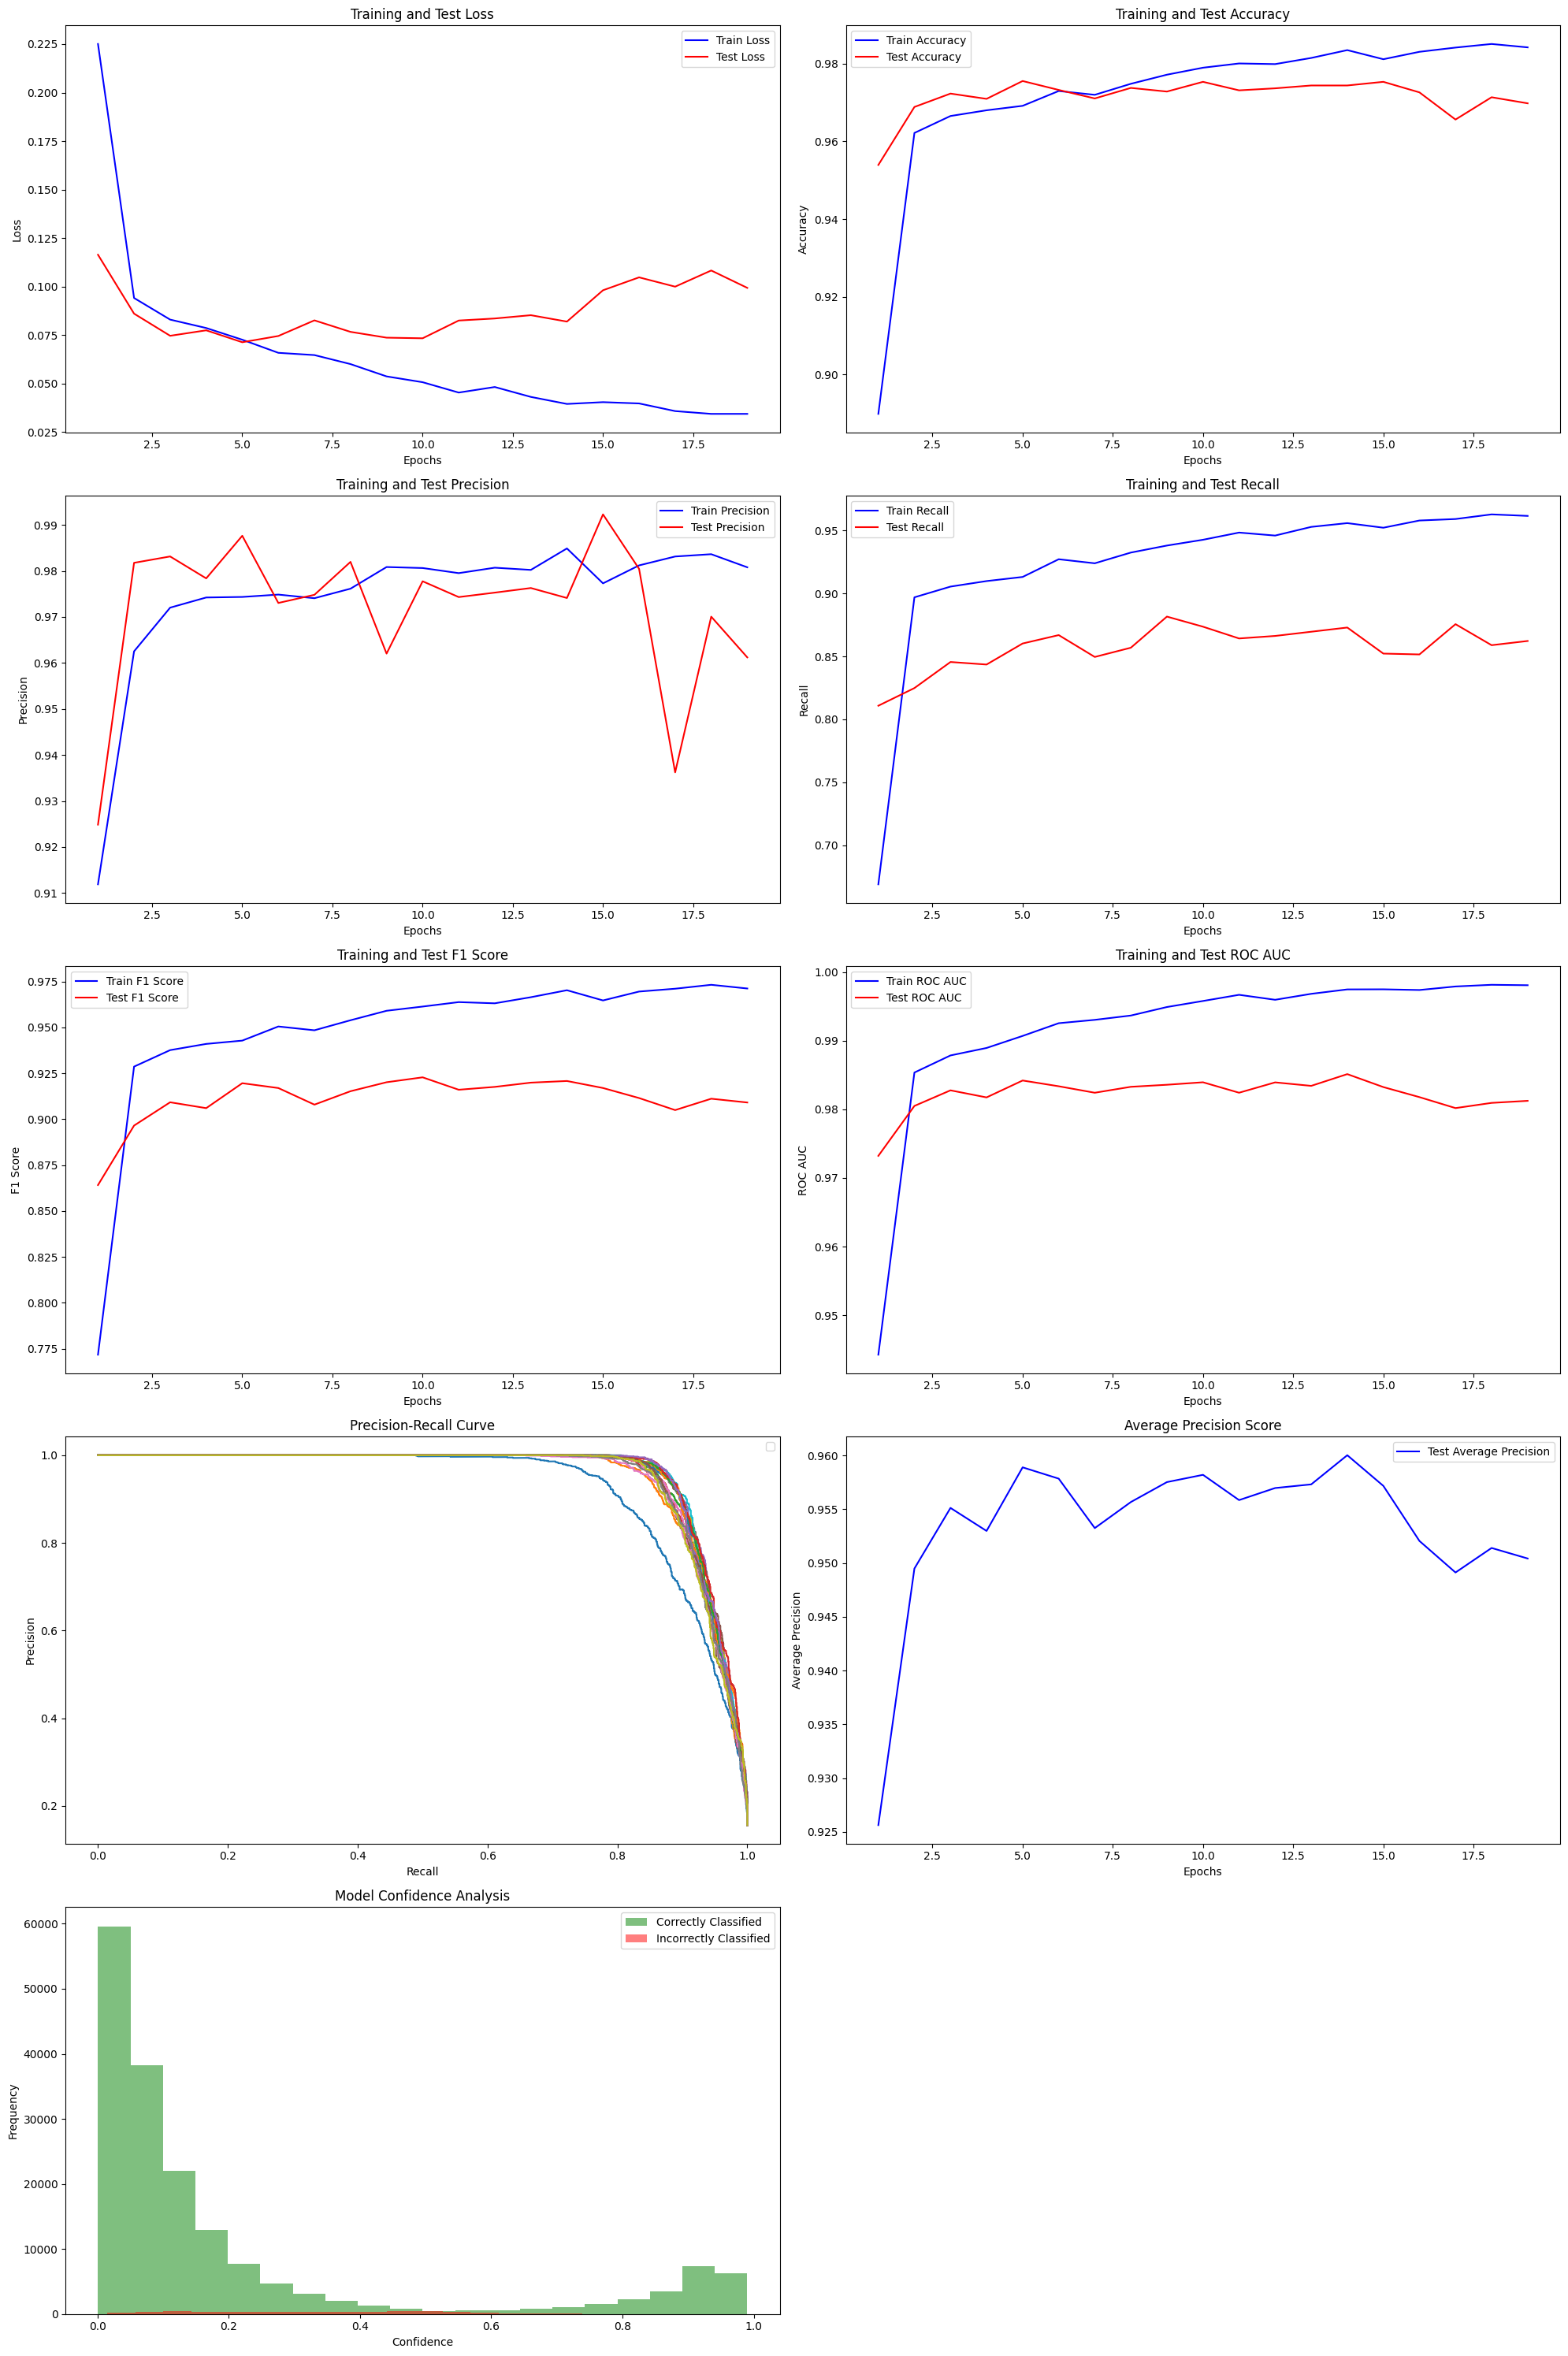

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_5.jpeg


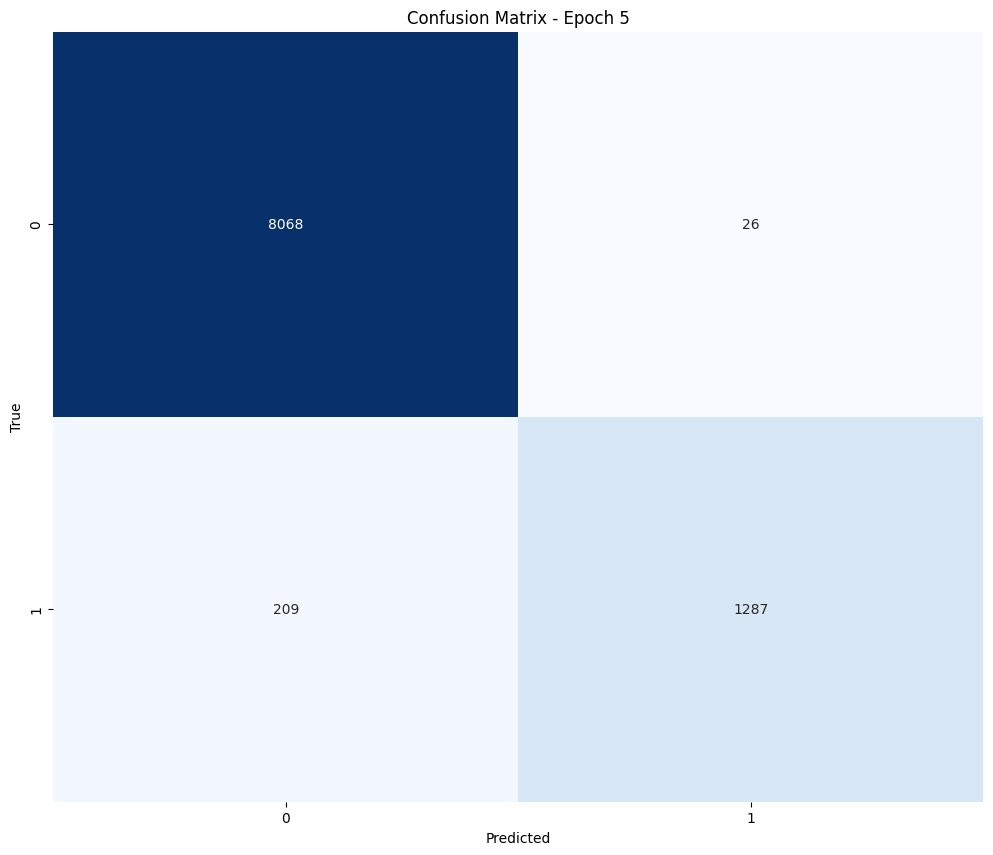

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_10.jpeg


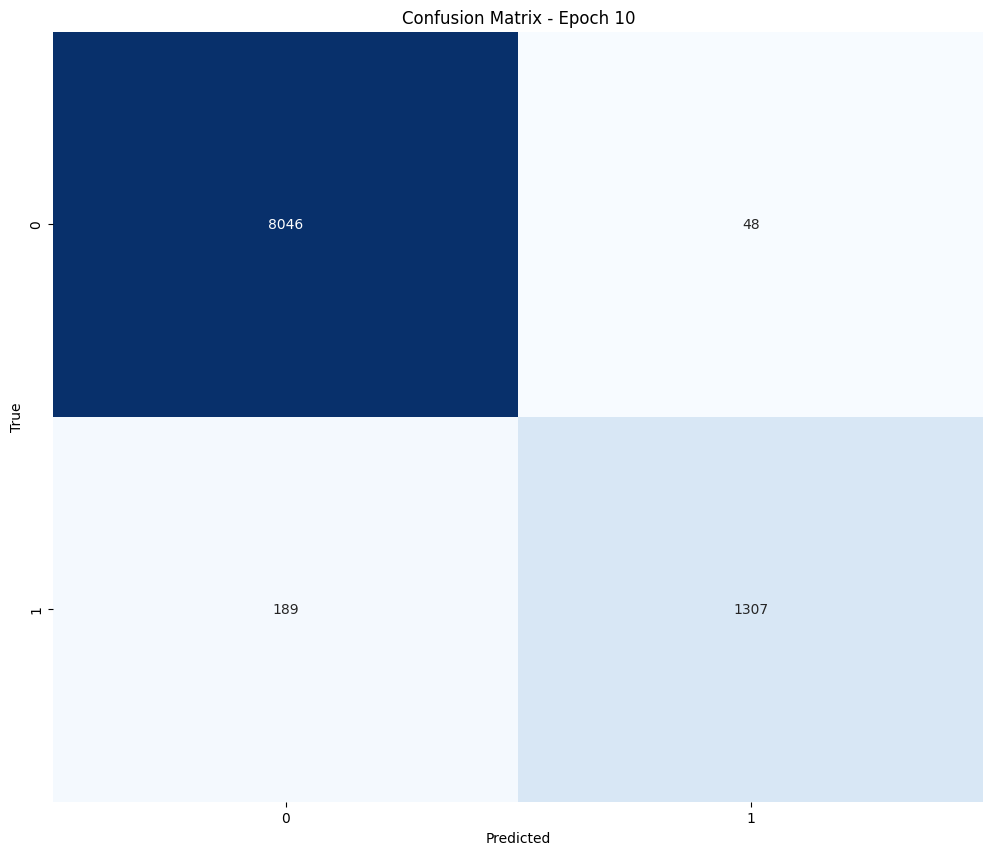

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_15.jpeg


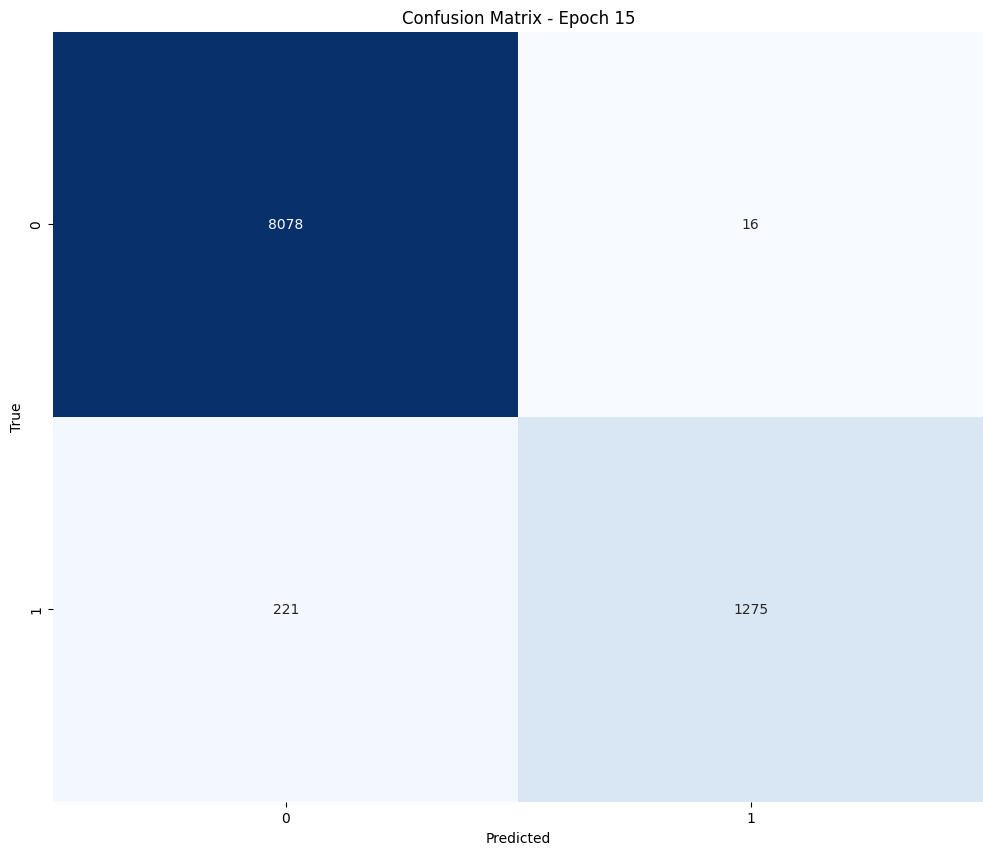

In [26]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Ensure you have tqdm imported

def plot_combined_metrics(H_pass1, H_pass2):
    # Combine metrics from Pass 1 and Pass 2
    combined_H = {}
    for key in H_pass1:
        combined_H[key] = H_pass1[key] + H_pass2[key]  # Concatenate metrics for Pass 1 and Pass 2
    
    # Number of epochs for combined training
    epochs = range(1, len(combined_H["train_loss"]) + 1)

    plt.figure(figsize=(20, 30))

    # Plot Training and Test Loss
    plt.subplot(5, 2, 1)
    plt.plot(epochs, combined_H["train_loss"], 'b', label='Train Loss')
    plt.plot(epochs, combined_H["test_loss"], 'r', label='Test Loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and Test Accuracy
    plt.subplot(5, 2, 2)
    plt.plot(epochs, combined_H["train_acc"], 'b', label='Train Accuracy')
    plt.plot(epochs, combined_H["test_acc"], 'r', label='Test Accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Training and Test Precision
    plt.subplot(5, 2, 3)
    plt.plot(epochs, combined_H["train_precision"], 'b', label='Train Precision')
    plt.plot(epochs, combined_H["test_precision"], 'r', label='Test Precision')
    plt.title('Training and Test Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Training and Test Recall
    plt.subplot(5, 2, 4)
    plt.plot(epochs, combined_H["train_recall"], 'b', label='Train Recall')
    plt.plot(epochs, combined_H["test_recall"], 'r', label='Test Recall')
    plt.title('Training and Test Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Plot Training and Test F1 Score
    plt.subplot(5, 2, 5)
    plt.plot(epochs, combined_H["train_f1"], 'b', label='Train F1 Score')
    plt.plot(epochs, combined_H["test_f1"], 'r', label='Test F1 Score')
    plt.title('Training and Test F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    # Plot Training and Test ROC AUC
    plt.subplot(5, 2, 6)
    plt.plot(epochs, combined_H["train_roc_auc"], 'b', label='Train ROC AUC')
    plt.plot(epochs, combined_H["test_roc_auc"], 'r', label='Test ROC AUC')
    plt.title('Training and Test ROC AUC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC AUC')
    plt.legend()

    # Plot Precision-Recall Curve for each epoch (from Pass 1 and Pass 2)
    plt.subplot(5, 2, 7)
    for precision, recall in combined_H["test_precision_recall_curve"]:
        plt.plot(recall, precision)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Average Precision Score
    plt.subplot(5, 2, 8)
    plt.plot(epochs, combined_H["test_average_precision"], 'b', label='Test Average Precision')
    plt.title('Average Precision Score')
    plt.xlabel('Epochs')
    plt.ylabel('Average Precision')
    plt.legend()
    
    # Confidence Analysis Visualization
    plt.subplot(5, 2, 9)
    plt.hist(combined_H["correct_confidences"], bins=20, alpha=0.5, label='Correctly Classified', color='g')
    plt.hist(combined_H["incorrect_confidences"], bins=20, alpha=0.5, label='Incorrectly Classified', color='r')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Model Confidence Analysis')
    plt.legend()

    plt.tight_layout()

    # Save the plot with higher DPI for better quality
    plot_filename = os.path.join(PLOT_PATH, "model_metrics_plot.jpeg")
    plt.savefig(plot_filename, format='jpeg', dpi=300)
    print(f"Plot saved to {plot_filename}")

    # Display the plot in the notebook
    plt.show()  # Show the plot in the notebook

    plt.close()  # Ensure the plot is cleared after saving to avoid showing it blank

    # Plot Confusion Matrices every 5 epochs
    for i, cm in enumerate(combined_H["confusion_matrices"]):
        if (i + 1) % 5 == 0:  # Plot every 5 epochs
            plt.figure(figsize=(12, 10))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix - Epoch {i+1}')
            plt.xlabel('Predicted')
            plt.ylabel('True')

            # Save confusion matrix plots
            cm_filename = os.path.join(PLOT_PATH, f"confusion_matrix_epoch_{i+1}.jpeg")
            plt.savefig(cm_filename, format='jpeg', dpi=300)
            print(f"Confusion Matrix saved to {cm_filename}")

            plt.show()  # Show confusion matrix in the notebook
            plt.close()  # Close the plot to avoid memory issues

# Function call to plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)


# interactive visual comparison for predictions


In [27]:
import pandas as pd
import torch
import random
import matplotlib.pyplot as plt
from torchvision import transforms

# Load the test CSV to get metadata information (only used for loading purposes, not during visualization)
def load_metadata(csv_path):
    return pd.read_csv(csv_path)

# Define Function for Interactive Visual Comparison of 20 Random Images
def interactive_visual_comparison(model, test_loader, device):
    model.eval()
    all_images = []
    all_targets = []
    all_preds = []
    transform_back = transforms.ToPILImage()

    with torch.no_grad():
        for images, metadata, targets in test_loader:  # Removed 'image_names' from the DataLoader
            images, metadata = images.to(device), metadata.to(device)
            targets = targets.to(device)
            
            # Make predictions
            outputs = model(images, metadata)
            preds = torch.sigmoid(outputs).round()  # Convert logits to binary predictions (0 or 1)
            
            # Store images, targets, and predictions
            all_images.extend(images.cpu().detach())
            all_targets.extend(targets.cpu().detach().numpy())
            all_preds.extend(preds.cpu().detach().numpy())
    
    # Randomly select 20 samples
    indices = random.sample(range(len(all_images)), 20)
    
    plt.figure(figsize=(20, 40))
    for i, idx in enumerate(indices):
        original_label = "malignant" if all_targets[idx] == 1 else "benign"
        predicted_label = "malignant" if all_preds[idx] == 1 else "benign"

        # Convert image tensor back to PIL image
        img = transform_back(all_images[idx])
        
        # Plot the image and prediction details
        plt.subplot(10, 2, i + 1)  # Corrected the subplot number
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Original: {original_label}\nPredicted: {predicted_label}")
        
    plt.tight_layout()
    plt.show()



# lesion predictions


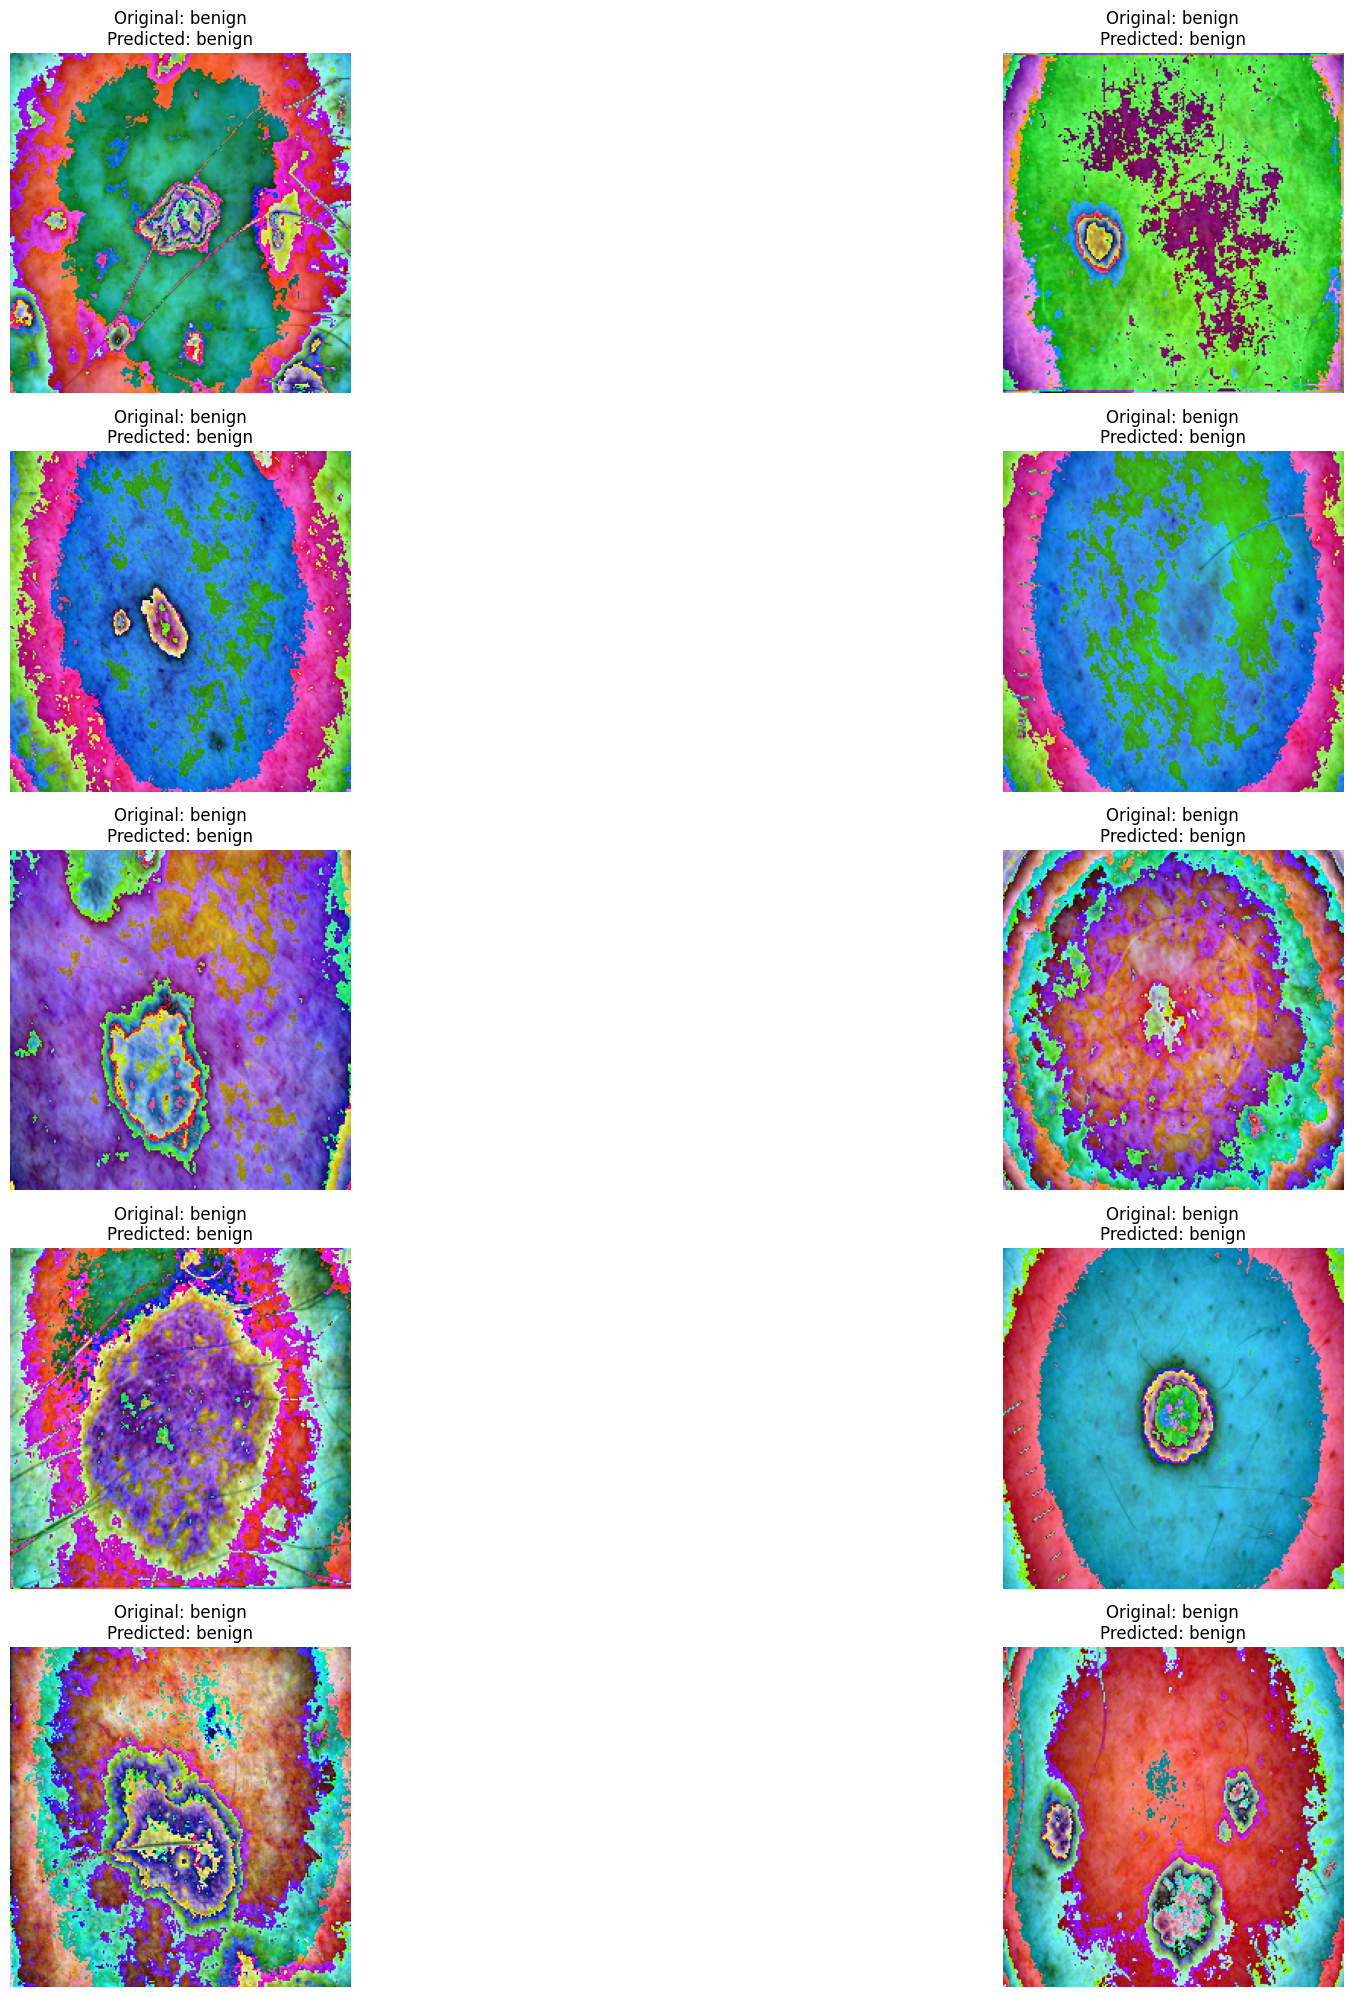

In [28]:
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')
test_metadata_df = LesionPredictions.load_metadata(TEST_CSV_PATH)

# Make sure to define 'model', 'test_loader', and 'DEVICE'
visualizer = LesionPredictions(model, test_loader, DEVICE)
visualizer.inference_prediction()

# GUI based tool making predictions

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import os
import torch
import pandas as pd
from torchvision import transforms
from PIL import Image
from resnet_model import ResNetModel  # Import your ResNet model class

# Define the device to run the model on
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
def load_model(model_path):
    # Initialize model
    num_metadata_features = 3  # Update based on your model's requirements
    model = ResNetModel(num_metadata_features).to(DEVICE)
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set the model to evaluation mode
    return model

# Prediction function
def predict(image_path, metadata):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(DEVICE)  # Add batch dimension and move to device
    sex_encoded = metadata['sex']
    age = metadata['age']
    site_encoded = metadata['site']
    input_metadata = torch.tensor([sex_encoded, age, site_encoded], dtype=torch.float).unsqueeze(0).to(DEVICE)  # Add batch dimension and move to device

    with torch.no_grad():
        output = model(image, input_metadata)
        prediction = torch.sigmoid(output).item()
        return "Malignant" if prediction >= 0.5 else "Benign", prediction

# Function to load image and metadata
def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display selected image in the GUI
        img_label.config(text=os.path.basename(file_path))
        processing_label.config(text="Processing...")

        # Extract metadata from the CSV files
        metadata = extract_metadata(os.path.basename(file_path))

        if metadata:
            # Perform prediction
            prediction, confidence = predict(file_path, metadata)
            result_label.config(text=f"Prediction: {prediction} (Confidence: {confidence:.2f})")
            processing_label.config(text="")
        else:
            messagebox.showerror("Error", "Metadata not found for the selected image.")

# Extract metadata from the CSV files
def extract_metadata(image_name):
    for csv_file in [TRAIN_CSV_PASS1, TRAIN_CSV_PASS2, TEST_CSV_PATH]:
        df = pd.read_csv(csv_file)
        row = df[df['image_name'] == image_name]
        if not row.empty:
            return {
                'sex': row['sex'].values[0],
                'age': row['age_approx'].values[0],
                'site': row['anatom_site_general_challenge'].values[0]
            }
    return None

# Create the main window
root = tk.Tk()
root.title("Skin Lesion Classification Tool")

# Transform for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the trained model
BASE_DIR = "/home/hifis/hifis0010"
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output', 'melanoma_trained_model.pth')
model = load_model(MODEL_PATH)

# UI Elements
load_button = tk.Button(root, text="Load Image", command=load_image)
load_button.pack()

img_label = tk.Label(root, text="")
img_label.pack()

processing_label = tk.Label(root, text="")
processing_label.pack()

result_label = tk.Label(root, text="")
result_label.pack()

# Logo - replace 'path_to_logo' with the actual path to your logo image
logo_path = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'uds.jpg')
logo = Image.open(logo_path)
logo = logo.resize((220, 150), Image.ANTIALIAS)
logo_image = tk.PhotoImage(logo)
logo_label = tk.Label(root, image=logo_image)
logo_label.pack()

# Run the main loop
root.mainloop()


TclError: no display name and no $DISPLAY environment variable